In [33]:
import warnings
warnings.filterwarnings("ignore")

In [34]:
# Initial imports
import pandas as pd
from path import Path
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(2)

In [3]:
filepath = Path("dataframe_with_tradesignals.csv")

data = pd.read_csv(filepath)

data.head()


,date,totalArticles,title&description,Sentiment Score,open,high,low,close,volume,daily_return,...,vol_trend_short,vol_trend_signal,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal,Positive Return
0,2020-12-18,18,How to invest in bitcoin: The major ways to bu...,1,22811.8,23317.1,22308.2,23130.5,6050.937552,0.013331,...,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0
1,2020-12-19,6,How will Bitcoin shift the power in the coffee...,1,23132.8,24288.2,22800.0,23871.5,6255.127803,0.032036,...,-1.0,-1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0
2,2020-12-20,14,"Tesla's Elon Musk asks about converting ""large...",1,23871.5,24297.7,23084.9,23480.7,5876.100372,-0.016371,...,-1.0,-1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
3,2020-12-21,13,Ripple to face SEC suit over XRP cryptocurrenc...,0,23480.8,24090.0,21885.6,22716.1,10783.182650,-0.032563,...,0.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
4,2020-12-22,10,SEC Sues Ripple Over XRP Cryptocurrency The ag...,1,22724.6,23837.0,22354.2,23828.2,5728.007668,0.048956,...,-1.0,-1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0


In [4]:
X = data.drop(columns="title&description")
X = X.set_index("date")
X = X.fillna(0)
X.head()



,totalArticles,Sentiment Score,open,high,low,close,volume,daily_return,volume change,spread,...,vol_trend_short,vol_trend_signal,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal,Positive Return
date,,,,,,,,,,,,,,,,,,,,,
2020-12-18,18,1,22811.8,23317.1,22308.2,23130.5,6050.937552,0.013331,-0.681420,0.044227,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2020-12-19,6,1,23132.8,24288.2,22800.0,23871.5,6255.127803,0.032036,0.033745,0.064333,...,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2020-12-20,14,1,23871.5,24297.7,23084.9,23480.7,5876.100372,-0.016371,-0.060595,0.050805,...,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-12-21,13,0,23480.8,24090.0,21885.6,22716.1,10783.182650,-0.032563,0.835092,0.093881,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-12-22,10,1,22724.6,23837.0,22354.2,23828.2,5728.007668,0.048956,-0.468802,0.065251,...,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [5]:
X["totalArticles"] = X["totalArticles"].astype("float")
X["Sentiment Score"] = X["Sentiment Score"].astype("float")
X.dtypes

totalArticles           float64
Sentiment Score         float64
open                    float64
high                    float64
low                     float64
close                   float64
volume                  float64
daily_return            float64
volume change           float64
spread                  float64
joy                     float64
fear                    float64
sadness                 float64
tentative               float64
analytical              float64
fast_close              float64
slow_close              float64
crossover_long          float64
crossover_short         float64
crossover_signal        float64
fast_vol                float64
slow_vol                float64
vol_trend_long          float64
vol_trend_short         float64
vol_trend_signal        float64
bollinger_mid_band      float64
bollinger_std           float64
bollinger_upper_band    float64
bollinger_lower_band    float64
bollinger_long          float64
bollinger_short         float64
bollinge

In [6]:
y = data[["Positive Return"]]
y.head()

,Positive Return
0,1.0
1,1.0
2,0.0
3,0.0
4,1.0


In [7]:
X = X.drop(columns="Positive Return")
X.head()

,totalArticles,Sentiment Score,open,high,low,close,volume,daily_return,volume change,spread,...,vol_trend_long,vol_trend_short,vol_trend_signal,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal
date,,,,,,,,,,,,,,,,,,,,,
2020-12-18,18.0,1.0,22811.8,23317.1,22308.2,23130.5,6050.937552,0.013331,-0.681420,0.044227,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-12-19,6.0,1.0,23132.8,24288.2,22800.0,23871.5,6255.127803,0.032036,0.033745,0.064333,...,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-12-20,14.0,1.0,23871.5,24297.7,23084.9,23480.7,5876.100372,-0.016371,-0.060595,0.050805,...,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-12-21,13.0,0.0,23480.8,24090.0,21885.6,22716.1,10783.182650,-0.032563,0.835092,0.093881,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-12-22,10.0,1.0,22724.6,23837.0,22354.2,23828.2,5728.007668,0.048956,-0.468802,0.065251,...,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Create training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [9]:
# Create the scaler instance
X_scaler = StandardScaler()

In [10]:
# Fit the scaler
X_scaler.fit(X_train)

StandardScaler()

In [11]:
# Scale the features data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [23]:
# Define the model
number_inputs = 32
number_hidden_nodes = 120

nn = Sequential()
nn.add(Dense(units=number_hidden_nodes, input_dim=number_inputs, activation="relu"))
nn.add(Dense(1, activation="sigmoid"))

In [24]:
# Compile model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [25]:
# Fit the model
model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 487ms/step - loss: 0.8282 - accuracy: 0.4167
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 0.7897 - accuracy: 0.4167
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 0.7531 - accuracy: 0.4167
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 0.7183 - accuracy: 0.5000
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 0.6853 - accuracy: 0.5833
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 0.6539 - accuracy: 0.5833
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 0.6241 - accuracy: 0.6667
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 0.5957 - accuracy: 0.7083
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 0.5686 - accuracy: 0.7500
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 0.5430 - accuracy: 0.8333
Epoch 11/100
1/1 [=========

<AxesSubplot:>

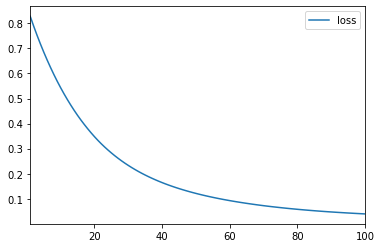

In [26]:
# Create a dataframe with the history dictionary
df_plot = pd.DataFrame(model.history, index=range(1, len(model.history["loss"]) + 1))

# Plot the loss
df_plot.plot(y="loss")

<AxesSubplot:>

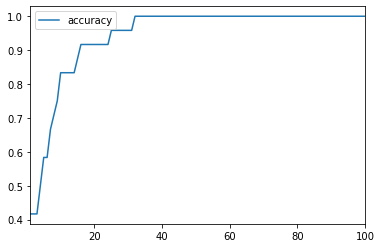

In [27]:
# Plot the accuracy
df_plot.plot(y="accuracy")

In [28]:
# Evaluate the model fit with linear dummy data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1/1 - 0s - loss: 0.7689 - accuracy: 0.7500
Loss: 0.76885986328125, Accuracy: 0.75


In [29]:
# Define the model
number_inputs = 32
number_hidden_nodes = 120

nn_2 = Sequential()
nn_2.add(Dense(units=number_hidden_nodes, input_dim=number_inputs, activation="tanh"))
nn_2.add(Dense(units=1, activation="hard_sigmoid"))

In [30]:
# Compile model
nn_2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [31]:
# Fit the model
model_2 = nn_2.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 578ms/step - loss: 0.6861 - accuracy: 0.5833
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 0.6482 - accuracy: 0.5833
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 0.6137 - accuracy: 0.6667
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 0.5819 - accuracy: 0.8333
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 0.5527 - accuracy: 0.9167
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 0.5255 - accuracy: 0.9167
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 0.5001 - accuracy: 0.9583
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 0.4761 - accuracy: 0.9167
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 0.4534 - accuracy: 0.9167
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 0.4316 - accuracy: 0.9167
Epoch 11/100
1/1 [=========

In [32]:
# Evaluate the model fit with linear dummy data
model_loss_2, model_accuracy_2 = nn_2.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss_2}, Accuracy: {model_accuracy_2}")

1/1 - 0s - loss: 2.1916 - accuracy: 0.7500
Loss: 2.191577672958374, Accuracy: 0.75
